# **importing libraries**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Veri kümesini okuma ve keşfetme**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# data = pd.read_csv("Online_Payments_Dataset.csv")
data = pd.read_csv("/content/drive/My Drive/Online_Payments_Dataset.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


```
Adim: 1 adımın 1 saate eşit olduğu bir zaman birimini temsil *eder*
Tur: çevrimiçi işlemin türü
Miktar: işlemin tutarı
musterininIsmi: işlemi başlatan müşteri
MusterininEskiBakiyesi: işlem öncesi bakiye
MusterininYeniBakiyesi: işlem sonrası bakiye
AlicininIsmi: işlemin alıcısı
AlicininEskibakiyesi: alıcının işlemden önceki ilk bakiyesi
AlicininYenibakiyesi: işlemden sonra alıcının yeni bakiyesi
Dolandiricilik: dolandırıcılık işlemi

```

In [ ]:
data = data.rename(columns={'step': 'Adim',
                            'type': 'Tur',
                            'amount': 'Miktar',
                            'nameOrig': 'MusterininIsmi',
                            'oldbalanceOrg': 'MusterininEskiBakiyesi',
                            'newbalanceOrig': 'MusterininYeniBakiyesi',
                            "nameDest":"AlicininIsmi",
                            "oldbalanceDest":"AlicininEskibakiyesi",
                            "newbalanceDest":'AlicininYenibakiyesi',
                            'isFraud': 'Dolandiricilik',
                            "isFlaggedFraud":"DolandiricilikOlarakIsaretlendi"})
data.head(10)

,Adim,Tur,Miktar,MusterininIsmi,MusterininEskiBakiyesi,MusterininYeniBakiyesi,AlicininIsmi,AlicininEskibakiyesi,AlicininYenibakiyesi,Dolandiricilik,DolandiricilikOlarakIsaretlendi
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
data.shape #Burada sütun ve satır sayısını gösterdik


(6362620, 11)

In [ ]:
data.tail()

,Adim,Tur,Miktar,MusterininIsmi,MusterininEskiBakiyesi,MusterininYeniBakiyesi,AlicininIsmi,AlicininEskibakiyesi,AlicininYenibakiyesi,Dolandiricilik,DolandiricilikOlarakIsaretlendi
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Adim                             int64  
 1   Tur                              object 
 2   Miktar                           float64
 3   MusterininIsmi                   object 
 4   MusterininEskiBakiyesi           float64
 5   MusterininYeniBakiyesi           float64
 6   AlicininIsmi                     object 
 7   AlicininEskibakiyesi             float64
 8   AlicininYenibakiyesi             float64
 9   Dolandiricilik                   int64  
 10  DolandiricilikOlarakIsaretlendi  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# **Eksik veri Silme**

Eksik veri sayısı:
Adim                               0
Tur                                0
Miktar                             0
MusterininIsmi                     0
MusterininEskiBakiyesi             0
MusterininYeniBakiyesi             0
AlicininIsmi                       0
AlicininEskibakiyesi               0
AlicininYenibakiyesi               0
Dolandiricilik                     0
DolandiricilikOlarakIsaretlendi    0
dtype: int64


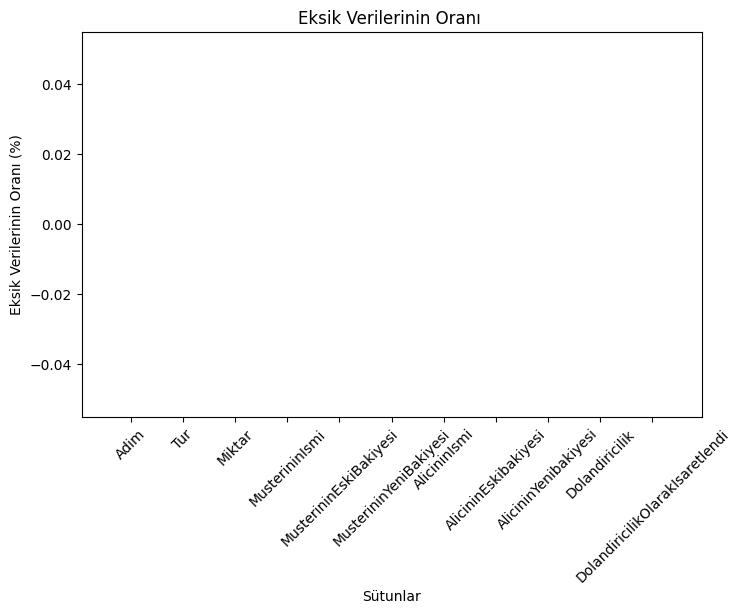

In [ ]:
print("Eksik veri sayısı:")
print(data.isnull().sum())

# if data.isnull().sum() != 0:
# # Boş değerleri ortalama ile doldur (veya istediğiniz başka bir stratejiyi kullanabilirsiniz)
#   data_filled = data.fillna(data.mean())
# print("\nEksik veri sayısı (doldurulduktan sonra):")
# print(data_filled.isnull().sum())

eksik_verilerin_sayisi = data.isnull().sum()
verilerin_toplam_sayisi = data.shape[0]
eksik_verilerin_orani = (eksik_verilerin_sayisi / verilerin_toplam_sayisi) * 100


plt.figure(figsize=(8, 5))
plt.bar(eksik_verilerin_orani.index, eksik_verilerin_orani.values, color='red')
plt.xlabel('Sütunlar')
plt.ylabel('Eksik Verilerinin Oranı (%)')
plt.title('Eksik Verilerinin Oranı ')
plt.xticks(rotation=45)
plt.show()


# **Tekrarlı Satırları Silme**

In [ ]:
tekrali_satirlarin_sayisi = data.duplicated().sum()
print("Tekrarli satirlarin sayisi: ")
data.duplicated().sum()
if tekrali_satirlarin_sayisi == 0:
    print('Veri setinde tekrarlı satırlar yoktur..')
else:
    print(f'Veri setinde {data.duplicated().sum()} tekrarlı satır bulunmaktadır\n')
    data.drop_duplicates(inplace=True)
    print(data.shape)

Tekrarli satirlarin sayisi: 
Veri setinde tekrarlı satırlar yoktur..


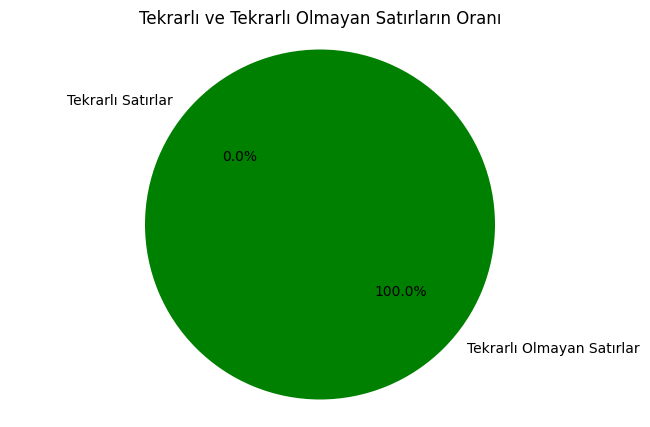

In [ ]:
# Veri setinde tekrarlı satırların sayısını ve oranını hesapla

tekrarli_olmayan_satirlar = len(data) - tekrali_satirlarin_sayisi
satirlar_sayisi = len(data)

tekrarli_satirlarin_orani = (tekrali_satirlarin_sayisi / satirlar_sayisi) * 100
tekrarli_olmayan_satirlarin_orani = (tekrarli_olmayan_satirlar / satirlar_sayisi) * 100

# Verileri görselleştir
labels = ['Tekrarlı Satırlar', 'Tekrarlı Olmayan Satırlar']
sizes = [tekrali_satirlarin_sayisi, tekrarli_olmayan_satirlar]
colors = ['red', 'green']

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Daireyi dairenin etrafında çiz
plt.title('Tekrarlı ve Tekrarlı Olmayan Satırların Oranı')
plt.show()

# **Her Özellikte Aykırı Değerler**

Dolandiricilik                     1.000000
Miktar                             0.076688
DolandiricilikOlarakIsaretlendi    0.044109
Adim                               0.031578
MusterininEskiBakiyesi             0.010154
AlicininYenibakiyesi               0.000535
AlicininEskibakiyesi              -0.005885
MusterininYeniBakiyesi            -0.008148
Name: Dolandiricilik, dtype: float64


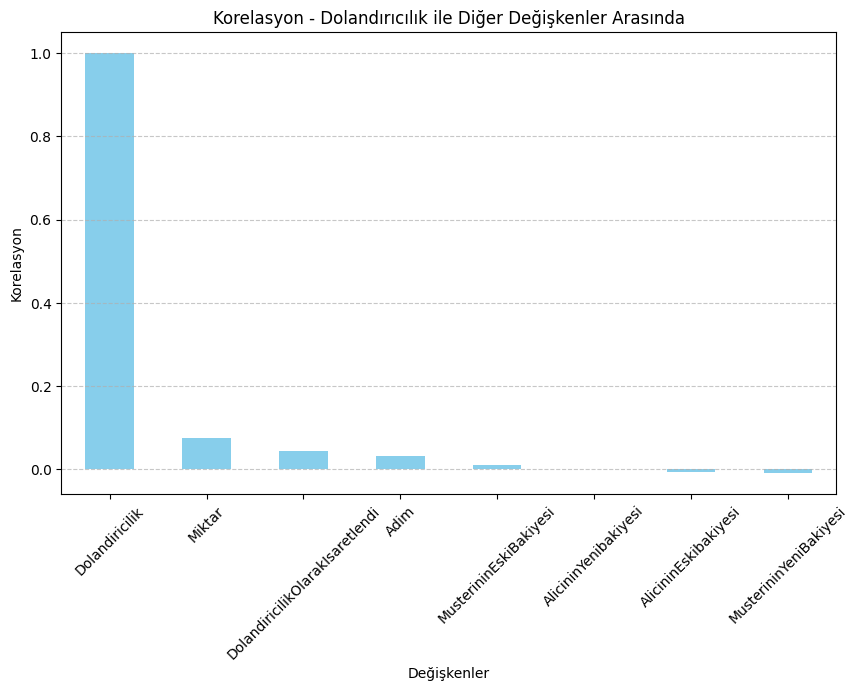

In [ ]:
data_temp = data.drop(['Tur', 'MusterininIsmi', 'AlicininIsmi'], axis=1, inplace=False)
correlation = data_temp.corr()



correlation_sorted = correlation['Dolandiricilik'].sort_values(ascending=False)
print(correlation_sorted)

# Korelasyonları çizdir
plt.figure(figsize=(10, 6))
correlation_sorted.plot(kind='bar', color='skyblue')
plt.title('Korelasyon - Dolandırıcılık ile Diğer Değişkenler Arasında')
plt.xlabel('Değişkenler')
plt.ylabel('Korelasyon')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# 1. Hangi değişkenler ile "dolandırıcılık" değişkeni arasında güçlü bir pozitif veya negatif ilişki var mı?
# 2. Her bir değişkenin "dolandırıcılık" değişkeni üzerindeki etkisi nedir? Değişkenlerin değerlerindeki artış veya azalma, dolandırıcılık vakalarında artış veya azalmaya yol açıyor mu?
# 3. "Dolandırıcılık" değişkeni üzerinde diğerlerinden daha fazla etkisi olduğu görülen belirli değişkenler var mı?
# 4. "Dolandırıcılık" değişkenine hiçbir etkisi olmayan değişkenler var mı?




In [ ]:
data.Tur.value_counts()

Tur
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [ ]:
#Sureç türlerinin dağılımı
type = data["Tur"].value_counts()
surecler = type.index
miktar = type.values
import plotly.express as px
fig = px.pie(data,values=miktar ,names = surecler,title="Sureç türlerinin dağılımı")

fig.show()

In [ ]:
#Kategorik özellikleri sayısala dönüştürme
data["Tur"] = data["Tur"].replace({"CASH_OUT":1,"PAYMENT":2,"CASH_IN":3,"TRANSFER":4,"DEBIT":5
})

data["Dolandiricilik"] = data["Dolandiricilik"].replace({
    0:"Hayir",1:"Evet"
})
data.head(10)

,Adim,Tur,Miktar,MusterininIsmi,MusterininEskiBakiyesi,MusterininYeniBakiyesi,AlicininIsmi,AlicininEskibakiyesi,AlicininYenibakiyesi,Dolandiricilik,DolandiricilikOlarakIsaretlendi
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,Hayir,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,Hayir,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,Evet,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,Evet,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,Hayir,0
5,1,2,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,Hayir,0
6,1,2,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,Hayir,0
7,1,2,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,Hayir,0
8,1,2,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,Hayir,0
9,1,5,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,Hayir,0


# **Model oluşturma**

In [ ]:
#özellikleri seçme ve veri kümesini bölme
from sklearn.model_selection import train_test_split
x =np.array(data[["Adim","Tur",'Miktar','MusterininEskiBakiyesi','MusterininYeniBakiyesi']])
y = np.array(data[["Dolandiricilik"]])
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = RandomForestClassifier()
model4 = KNeighborsClassifier()
model1.fit(x_train, y_train.ravel())
model2.fit(x_train, y_train.ravel())
model3.fit(x_train, y_train.ravel())
model4.fit(x_train, y_train.ravel())

KNeighborsClassifier()

In [ ]:
print("DecisionTreeClassifier:",model1.score(x_test,y_test))
print("LogisticRegression:",model2.score(x_test,y_test))
print("RandomForestClassifier:",model3.score(x_test,y_test))
print("KNeighborsClassifier:",model4.score(x_test,y_test))

DecisionTreeClassifier: 0.9996479437715909
LogisticRegression: 0.9981438464028969
RandomForestClassifier: 0.9996935224797332
KNeighborsClassifier: 0.9996809490430043


In [ ]:
data.head()

,Adim,Tur,Miktar,Orjinalİsim,EskiBakiyeOrjinal,YeniBakiyeOrjinal,Hedefİsimi,EskiBakiyeHedef,YeniBakiyeHedef,Dolandiricilik,DolandiricilikOlarakIsaretlendi
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,Hayir,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,Hayir,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Evet,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Evet,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,Hayir,0


In [ ]:
ozellikler = np.array([[1,2,9839.64,170136.0,160296.36]])
tahmin_model1 = model1.predict(ozellikler)
print(tahmin_model1)

['Hayir']


In [ ]:
ozellikler = np.array([[1,1,181.00,181.0,0.00]])
tahmin_model1 = model1.predict(ozellikler)
print(tahmin_model1)

['Evet']
